# NLP with oil and renewable energies project: sentiment analysis

#### Get libraries

In [2]:
import requests
import re
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import numpy as np
from PIL import Image
from sklearn.linear_model import LogisticRegression
import argparse
from matplotlib import pyplot as plt
import wordcloud
import requests, json
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

### Step 1: Creating dfs

In [3]:
corpus_oil_price=pd.read_csv("oil_price.csv", index_col=0)
corpus_alternative_energies=pd.read_csv("alternative_energies.csv", index_col=0)
corpus_crude_oil=pd.read_csv("crude_oil.csv", index_col=0)
corpus_oil_price

,title,date_published,content
0,$70 Oil Won't Keep OPEC Happy,2021-11-29T19:00:00-06:00,One day&mdash;that was all it took oil prices ...
1,Why This Oil Price Slump May Not Be Bad News F...,2021-12-02T19:00:00-06:00,Crude oil prices are plunging under the weight...
2,The Double Irony Of Biden's Plea To OPEC,2021-11-10T13:00:00-06:00,As I wrote in February of this year in&nbsp;Th...
3,The Oil Price Rally Is Far From Over,2021-11-09T19:00:00-06:00,How much higher could oil prices go This is th...
4,"Biden Threatens OPEC With Undisclosed ""Tools""",2021-11-08T10:00:00-06:00,"""There are other tools in the arsenal that we ..."
...,...,...,...
2183,A Disobliging Update on the Price of Oil,2010-01-09T16:21:21-06:00,There still seems to be a deplorable uncertain...
2184,What Happens When the Wells Run Dry,2010-01-08T16:55:39-06:00,One nagging question that the industrial world...
2185,Petro Unfriendly California Changing it's Stan...,2009-12-30T14:18:05-06:00,The financial crisis changed the way people th...
2186,New Techniques Oil Companies are Using in Dril...,2009-11-25T16:35:34-06:00,As the politics and philosophical arguments ab...


### Step 2: Transforming dfs into lists

In [4]:
col_one_list = corpus_oil_price['content'].tolist()
col_one_list_2 = corpus_alternative_energies['content'].tolist()
col_one_list_3 = corpus_crude_oil['content'].tolist()

### Step 3: Baseline sentiment analysis (total negative vs total positive word count)

In [8]:
for file in os.listdir('./'):
    if file.startswith('pos'):
        with open(file,mode='r',encoding = 'latin1') as fp:
            pos_list= fp.read().split()
    elif file.startswith('nega'):
        with open(file,mode='r',encoding='latin1') as fn:
             neg_list = fn.read().split()

In [10]:
sentiment_list = []
for i in col_one_list:
    result = 0
    pos_words = [word for word in i.split() if word in pos_list]
    neg_words = [word for word in i.split() if word in neg_list]
    if len(pos_words) > len(neg_words):
        result += 1
    elif len(pos_words) < len(neg_words):
        result += -1
    else:
        result += 0
    sentiment_list.append(result)
sentiment_list

[-1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 0,
 -1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 1,
 -1,

In [13]:
sentiment_list_2 = []
for i in col_one_list_2:
    result = 0
    pos_words = [word for word in i.split() if word in pos_list]
    neg_words = [word for word in i.split() if word in neg_list]
    if len(pos_words) > len(neg_words):
        result += 1
    elif len(pos_words) < len(neg_words):
        result += -1
    else:
        result += 0
    sentiment_list_2.append(result)
sentiment_list_2

[1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1

In [14]:
sentiment_list_3 = []
for i in col_one_list_3:
    result = 0
    pos_words = [word for word in i.split() if word in pos_list]
    neg_words = [word for word in i.split() if word in neg_list]
    if len(pos_words) > len(neg_words):
        result += 1
    elif len(pos_words) < len(neg_words):
        result += -1
    else:
        result += 0
    sentiment_list_3.append(result)
sentiment_list_3

[-1,
 0,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,


In [15]:
corpus_oil_price['baseline_sentiment'] = sentiment_list
corpus_alternative_energies['baseline_sentiment'] = sentiment_list_2
corpus_crude_oil['baseline_sentiment'] = sentiment_list_3

### Step 4: Sentiment analysis with VADER

In [17]:
s = SentimentIntensityAnalyzer()

In [18]:
vader_result_list = []
for t in col_one_list:
    vader = s.polarity_scores(t)['compound']
    vader_result_list.append(vader)

In [19]:
vader_result_list_2 = []
for t in col_one_list_2:
    vader = s.polarity_scores(t)['compound']
    vader_result_list_2.append(vader)

In [20]:
vader_result_list_3 = []
for t in col_one_list_3:
    vader = s.polarity_scores(t)['compound']
    vader_result_list_3.append(vader)

In [22]:
corpus_oil_price['vader_sentiment'] = vader_result_list
corpus_alternative_energies['vader_sentiment'] = vader_result_list_2
corpus_crude_oil['vader_sentiment'] = vader_result_list_3

In [25]:
corpus_oil_price.to_csv('data/corpus_oil_price.csv')
corpus_alternative_energies.to_csv('data/corpus_alternative_energies.csv')
corpus_crude_oil.to_csv('data/corpus_crude_oil.csv')

### Step 5: Creating visualisations

In [28]:
corpus_oil_price=pd.read_csv("data/corpus_oil_price.csv", index_col=0)
corpus_alternative_energies=pd.read_csv("data/corpus_alternative_energies.csv", index_col=0)
corpus_crude_oil=pd.read_csv("data/corpus_crude_oil.csv", index_col=0)

In [29]:
corpus_oil_price["date_published"] = pd.to_datetime(corpus_oil_price["date_published"], utc=True)
corpus_alternative_energies["date_published"] = pd.to_datetime(corpus_alternative_energies["date_published"], utc=True)
corpus_crude_oil["date_published"] = pd.to_datetime(corpus_crude_oil["date_published"], utc=True)
corpus_crude_oil


,title,date_published,content,baseline_sentiment,vader_sentiment
0,Oil Bulls Rejoice As Biden's Supply Strategy B...,2021-11-25 00:00:00+00:00,President Biden&rsquo;s threat to oil producer...,-1,-0.9926
1,"OPEC To Add 400,000 Bpd In January Despite Oil...",2021-12-02 14:53:55+00:00,The OPEC group is sticking to its plan to ease...,0,0.4497
2,UAE Pumps $6 Billion Into Oil And Gas Expansio...,2021-11-24 23:00:00+00:00,The U.S.-sponsored &lsquo;relationship normali...,1,0.9875
3,China Keeps Markets In The Dark About SPR Release,2021-11-24 22:00:00+00:00,The volume of the expected Chinese release of ...,-1,-0.9552
4,Oil Markets Unimpressed By Small Crude Invento...,2021-11-24 15:36:00+00:00,"Crude oil inventories rose last week, while ga...",-1,-0.9601
...,...,...,...,...,...
5000,A Detailed Guide on the Many Different Types o...,2009-12-02 23:12:01+00:00,Some people arbitrarily speak about oil as if ...,-1,-0.9962
5001,What is Peak Oil Theory A Thorough Look at Thi...,2009-10-21 21:17:44+00:00,Currently there is a lot of debate going on re...,1,-0.1567
5002,Oil Shale - So Just What Is It,2009-09-24 22:26:55+00:00,People often say &ldquo;You can&rsquo;t squeez...,-1,0.9816
5003,Oil is not a Villain Here's what it's done for us,2009-09-21 21:45:02+00:00,"For decades now, oil has often been vilified a...",1,0.9987


In [39]:
corpus_oil_price_resampled = corpus_oil_price.resample('Y', on='date_published').mean()
corpus_alternative_energies_resampled = corpus_alternative_energies.resample('Y', on='date_published').mean()
corpus_crude_oil_resampled = corpus_crude_oil.resample('Y', on='date_published').mean()
corpus_crude_oil_resampled

,baseline_sentiment,vader_sentiment
date_published,,
2009-12-31 00:00:00+00:00,-0.200000,-0.032100
2010-12-31 00:00:00+00:00,-0.084337,0.508155
2011-12-31 00:00:00+00:00,-0.200000,0.291627
2012-12-31 00:00:00+00:00,-0.243655,0.359161
2013-12-31 00:00:00+00:00,-0.004386,0.422901
2014-12-31 00:00:00+00:00,-0.359813,0.094498
2015-12-31 00:00:00+00:00,-0.083141,0.289543
2016-12-31 00:00:00+00:00,-0.245726,0.108238
2017-12-31 00:00:00+00:00,-0.071203,0.260844


In [41]:
corpus_oil_price_resampled.index = pd.to_datetime(corpus_oil_price_resampled.index).strftime('%Y-%m')
corpus_alternative_energies_resampled.index = pd.to_datetime(corpus_alternative_energies_resampled.index).strftime('%Y-%m')
corpus_crude_oil_resampled.index = pd.to_datetime(corpus_crude_oil_resampled.index).strftime('%Y-%m')
corpus_crude_oil_resampled

,baseline_sentiment,vader_sentiment
date_published,,
2009-01,-0.200000,-0.032100
2010-01,-0.084337,0.508155
2011-01,-0.200000,0.291627
2012-01,-0.243655,0.359161
2013-01,-0.004386,0.422901
2014-01,-0.359813,0.094498
2015-01,-0.083141,0.289543
2016-01,-0.245726,0.108238
2017-01,-0.071203,0.260844


In [54]:
stats = pd.read_csv("data/stats.csv", index_col=0)
stats

,money_of_the_day,2020_money,oil_production,renewables
date_published,,,,
2009-01,61.67,74.40,81491,635.8
2010-01,79.50,94.35,83293,761.2
2011-01,111.26,128.01,84042,908.2
2012-01,111.67,125.88,86255,1067.9
2013-01,108.66,120.72,86670,1245.5
2014-01,98.95,108.17,88834,1414.0
2015-01,52.39,57.20,91632,1634.4
2016-01,43.73,47.16,91989,1851.3
2017-01,54.19,57.22,92568,2180.2


In [55]:
corpus_oil_price_resampled_2 = corpus_oil_price_resampled.merge(stats, on="date_published")
corpus_alternative_energies_resampled_2 = corpus_alternative_energies_resampled.merge(stats, on="date_published")
corpus_crude_oil_resampled_2 = corpus_crude_oil_resampled.merge(stats, on="date_published")
corpus_crude_oil_resampled_2

,baseline_sentiment,vader_sentiment,money_of_the_day,2020_money,oil_production,renewables
date_published,,,,,,
2009-01,-0.200000,-0.032100,61.67,74.40,81491,635.8
2010-01,-0.084337,0.508155,79.50,94.35,83293,761.2
2011-01,-0.200000,0.291627,111.26,128.01,84042,908.2
2012-01,-0.243655,0.359161,111.67,125.88,86255,1067.9
2013-01,-0.004386,0.422901,108.66,120.72,86670,1245.5
2014-01,-0.359813,0.094498,98.95,108.17,88834,1414.0
2015-01,-0.083141,0.289543,52.39,57.20,91632,1634.4
2016-01,-0.245726,0.108238,43.73,47.16,91989,1851.3
2017-01,-0.071203,0.260844,54.19,57.22,92568,2180.2


In [65]:
year_list = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
corpus_oil_price_resampled_2['year']=year_list
corpus_alternative_energies_resampled_2['year']=year_list
corpus_crude_oil_resampled_2['year']=year_list

,baseline_sentiment,vader_sentiment,money_of_the_day,2020_money,oil_production,renewables,year
date_published,,,,,,,
2009-01,-0.200000,-0.032100,61.67,74.40,81491,635.8,2009
2010-01,-0.084337,0.508155,79.50,94.35,83293,761.2,2010
2011-01,-0.200000,0.291627,111.26,128.01,84042,908.2,2011
2012-01,-0.243655,0.359161,111.67,125.88,86255,1067.9,2012
2013-01,-0.004386,0.422901,108.66,120.72,86670,1245.5,2013
2014-01,-0.359813,0.094498,98.95,108.17,88834,1414.0,2014
2015-01,-0.083141,0.289543,52.39,57.20,91632,1634.4,2015
2016-01,-0.245726,0.108238,43.73,47.16,91989,1851.3,2016
2017-01,-0.071203,0.260844,54.19,57.22,92568,2180.2,2017


In [66]:
corpus_oil_price_resampled_2.to_csv('data/corpus_oil_price_final.csv')
corpus_alternative_energies_resampled_2.to_csv('data/corpus_alternative_energies_final.csv')
corpus_crude_oil_resampled_2.to_csv('data/corpus_crude_oil_final.csv')

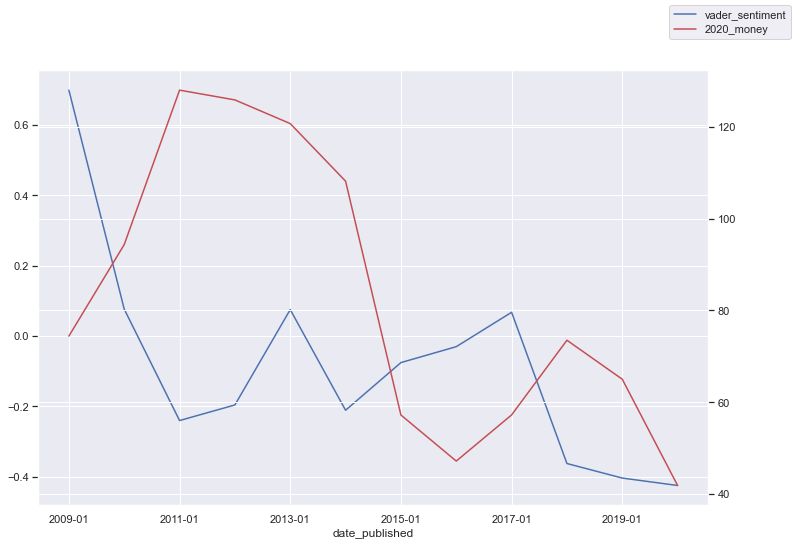

In [58]:
sns.set(rc = {'figure.figsize':(12,8)})
ax = corpus_oil_price_resampled_2.plot(y="vader_sentiment", legend=False)
ax2 = ax.twinx()
corpus_oil_price_resampled_2.plot(y="2020_money", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

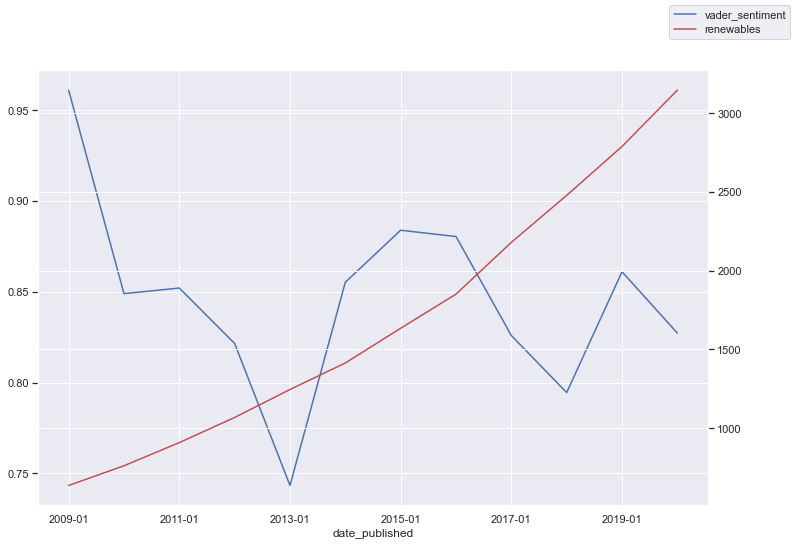

In [52]:
sns.set(rc = {'figure.figsize':(12,8)})
ax = corpus_alternative_energies_resampled_2.plot(y="vader_sentiment", legend=False)
ax2 = ax.twinx()
corpus_alternative_energies_resampled_2.plot(y="renewables", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

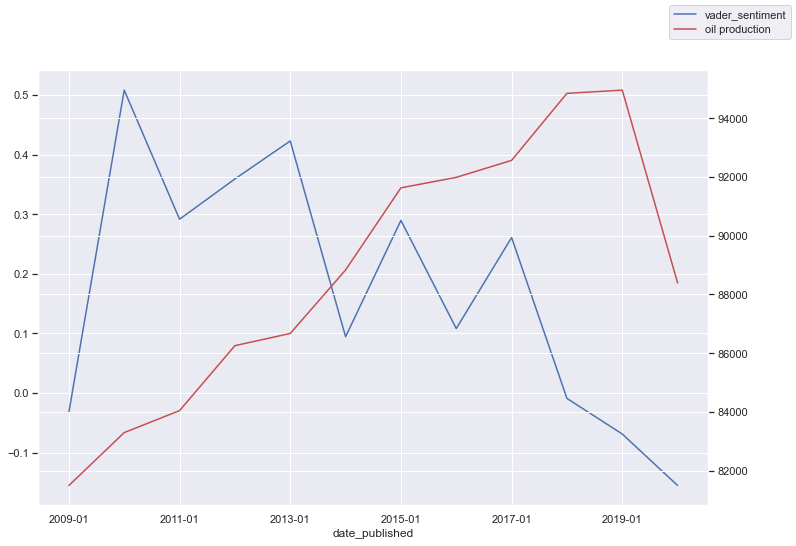

In [49]:
sns.set(rc = {'figure.figsize':(12,8)})
ax = corpus_crude_oil_resampled_2.plot(y="vader_sentiment", legend=False)
ax2 = ax.twinx()
corpus_crude_oil_resampled_2.plot(y="oil production", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()